In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assignment1 Part

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing  
from sklearn.impute import SimpleImputer  
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from pprint import pprint
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

In [3]:
import copy as cp

In [4]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
df = pd.read_csv("/content/drive/My Drive/5155-hw1/drug_consumption.data")

In [6]:
columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore",
           "Oscore","Ascore","Cscore","Impulsive","SS","Alcohol","Amphet","Amyl",
           "Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin",
           "Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

In [7]:
#df.to_excel("/content/drive/My Drive/5155-hw1/drug_consumption.xlsx")

In [8]:
df.columns = columns

In [9]:
df.drop("ID",axis = 1,inplace = True)

In [10]:
#check with the data description to make sure the data is correct
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.034364,-0.000512,-0.003777,0.355221,-0.309808,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,0.878529,0.482588,0.950330,0.700382,0.165967,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [11]:
temp = df.loc[:,"Alcohol":"VSA"]

In [12]:
for c in temp:
  # print(c)
  temp[c].replace(['CL0','CL1'],'Non-user',inplace = True)
  temp[c].replace(['CL2','CL3','CL4','CL5','CL6'],'User',inplace = True)
  # for i in temp[c]:
    
  #   if i in ['CL0','CL1']:
  #     temp[c].replace(i,'Non-user',inplace = True)
  #   else:
  #     temp[c].replace(i,'User',inplace = True)

In [13]:
temp.describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
freq,1816,1206,1514,1116,1847,1265,1849,1197,1693,1133,1672,1534,1122,1327,1467,1190,1263,1878,1654


In [14]:
#temp.to_csv("/content/drive/My Drive/5155-hw1/temp.csv")

In [15]:
df.loc[:,"Alcohol":"VSA"] = temp.loc[:,"Alcohol":"VSA"]

In [16]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,Non-user,User
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,User,Non-user,Non-user,User,User,User,User,User,Non-user,Non-user
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,Non-user
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,User,Non-user,Non-user,User,User,Non-user,User,User,Non-user,Non-user


In [17]:
X = df.loc[:,"Age":"SS"]

In [18]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


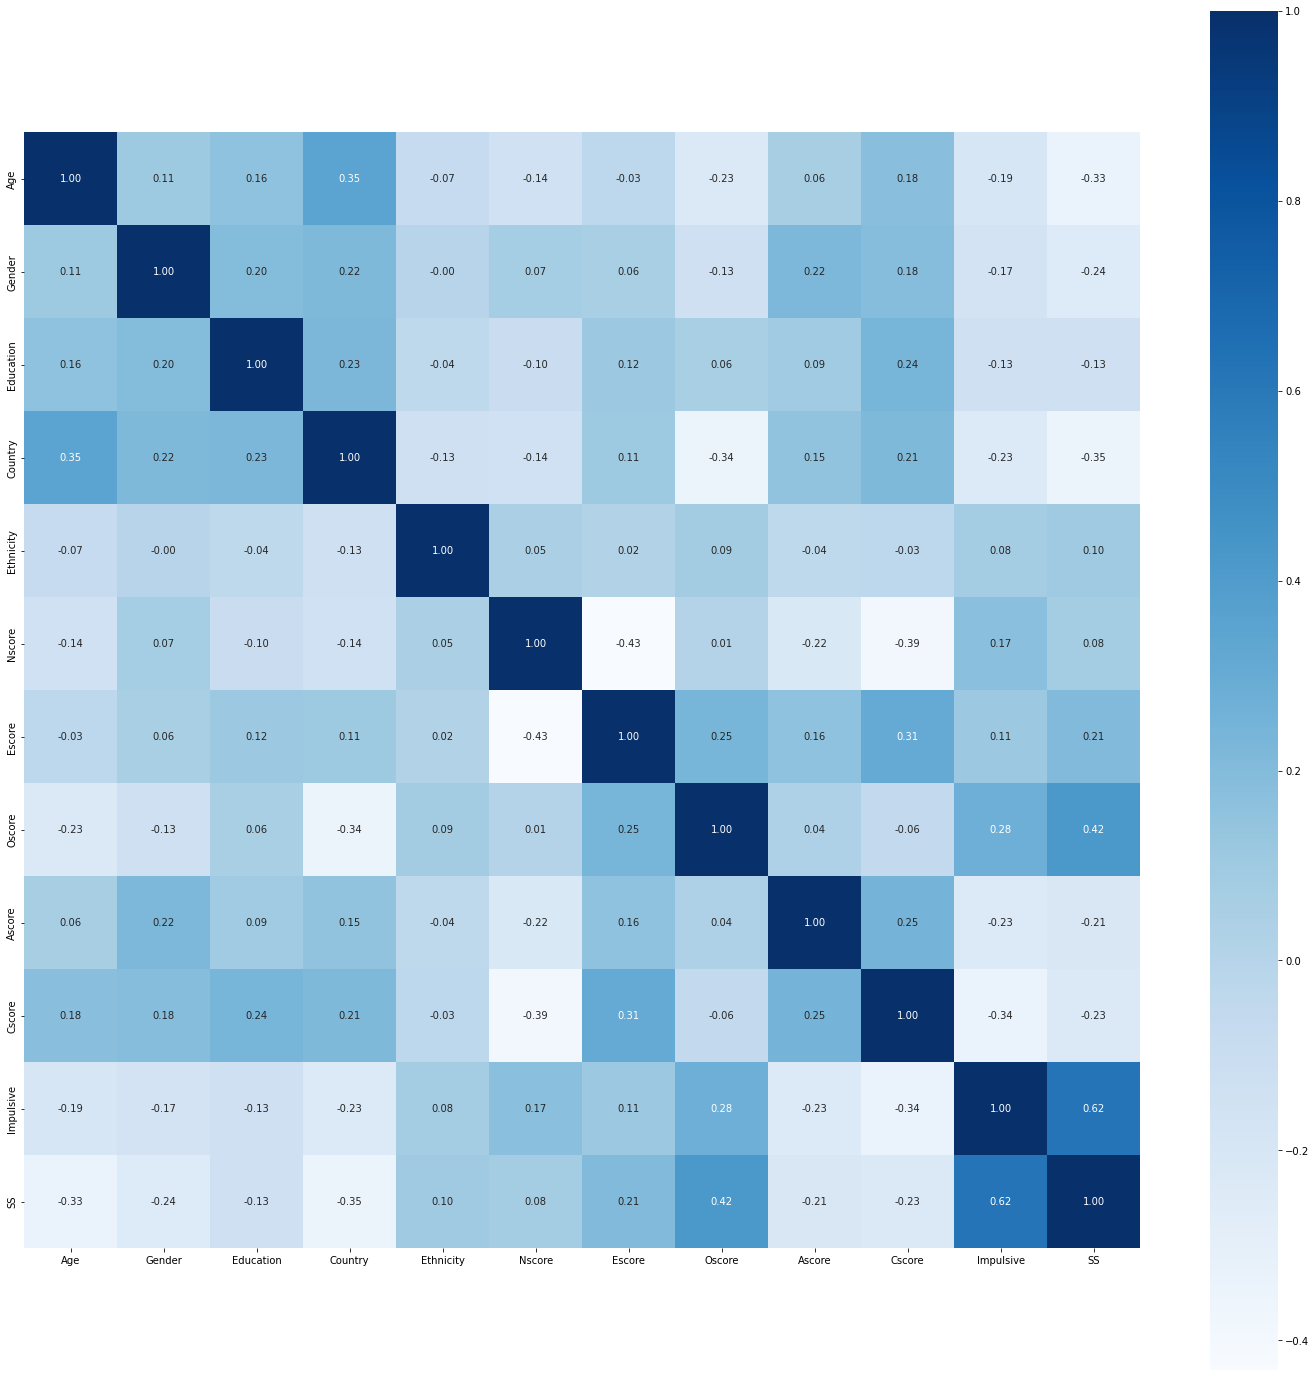

In [19]:
plt.figure(figsize = (25,25))
corr_values1 = X.corr() 
sns.heatmap(corr_values1, annot=True,vmax=1, square=True, cmap="Blues",fmt='.2f')

In [20]:
X.drop('SS',axis = 1,inplace = True)

In [21]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983
...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221


In [22]:
labels = []
for col in df.loc[:,'Alcohol':'Cannabis']:
  labels.append(col)

In [23]:
labels

['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis']

In [24]:
df[labels].describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis
count,1884,1884,1884,1884,1884,1884
unique,2,2,2,2,2,2
top,User,Non-user,Non-user,Non-user,User,User
freq,1816,1206,1514,1116,1847,1265


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983
...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221


svm confusion_matrix: [[544   0]
 [ 22   0]]
svm accuracy: 0.9611307420494699
svm Presion: [0.96113074 0.        ]
svm Recall: [1. 0.]
rf confusion_matrix: [[544   0]
 [ 22   0]]
rf accuracy: 0.9611307420494699
rf Presion: [0.96113074 0.        ]
rf Recall: [1. 0.]
dt confusion_matrix: [[522  22]
 [ 19   3]]
dt accuracy: 0.9275618374558304
dt Presion: [0.96487985 0.12      ]
dt Recall: [0.95955882 0.13636364]
knn confusion_matrix: [[543   1]
 [ 21   1]]
knn accuracy: 0.9611307420494699
knn Presion: [0.96276596 0.5       ]
knn Recall: [0.99816176 0.04545455]


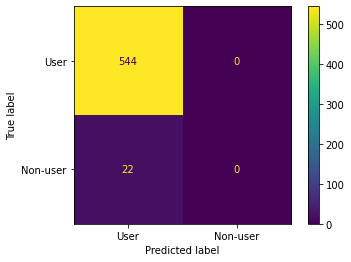

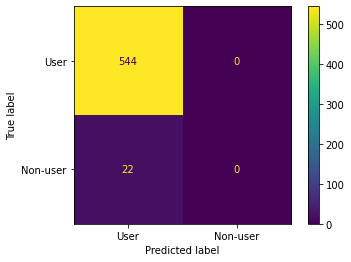

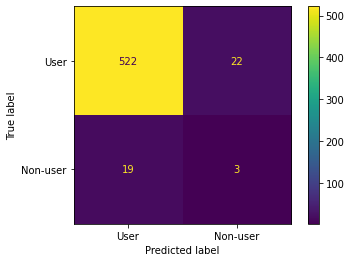

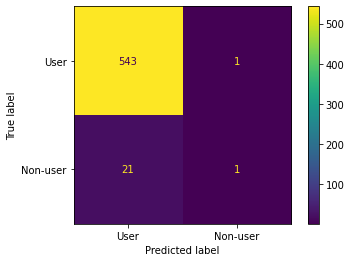

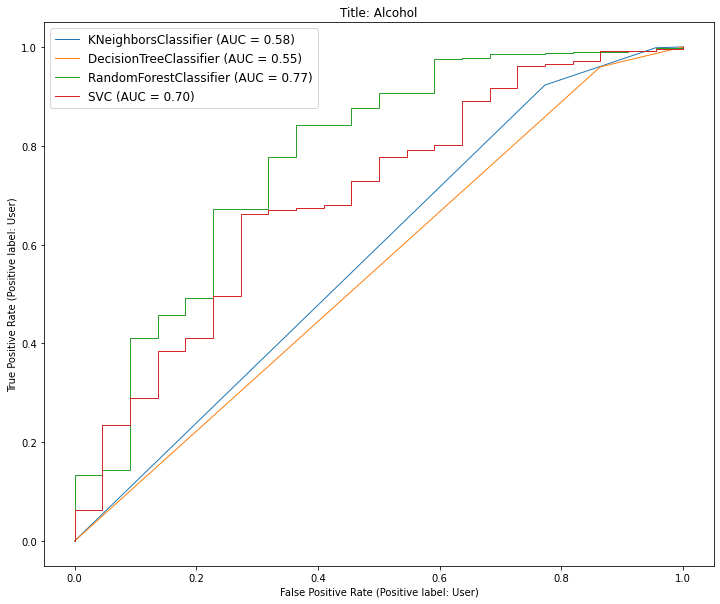

svm confusion_matrix: [[105  90]
 [ 57 314]]
svm accuracy: 0.7402826855123675
svm Presion: [0.64814815 0.77722772]
svm Recall: [0.53846154 0.84636119]
rf confusion_matrix: [[ 84 111]
 [ 45 326]]
rf accuracy: 0.7243816254416962
rf Presion: [0.65116279 0.74599542]
rf Recall: [0.43076923 0.8787062 ]
dt confusion_matrix: [[ 92 103]
 [ 94 277]]
dt accuracy: 0.6519434628975265
dt Presion: [0.49462366 0.72894737]
dt Recall: [0.47179487 0.74663073]
knn confusion_matrix: [[115  80]
 [ 76 295]]
knn accuracy: 0.7243816254416962
knn Presion: [0.60209424 0.78666667]
knn Recall: [0.58974359 0.79514825]


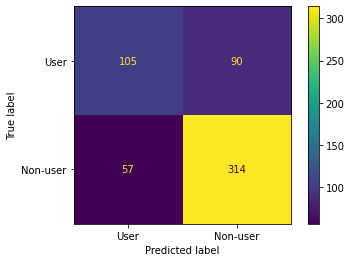

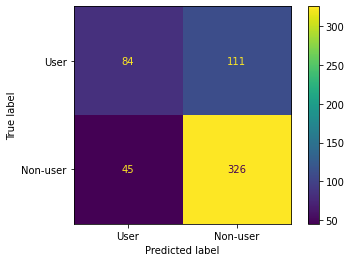

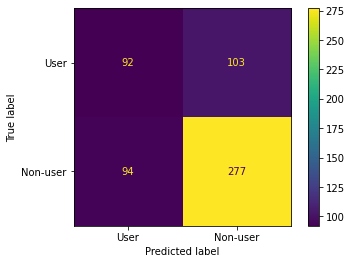

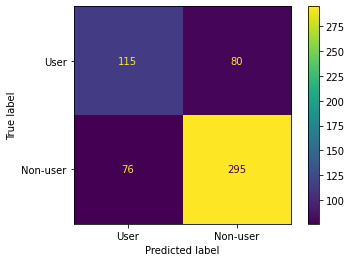

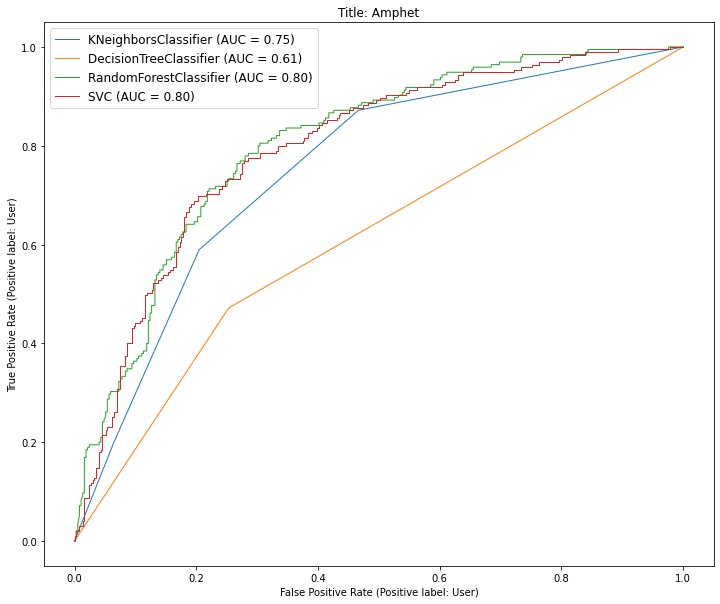

svm confusion_matrix: [[  2 109]
 [  2 453]]
svm accuracy: 0.803886925795053
svm Presion: [0.5        0.80604982]
svm Recall: [0.01801802 0.9956044 ]
rf confusion_matrix: [[  0 111]
 [  0 455]]
rf accuracy: 0.803886925795053
rf Presion: [0.         0.80388693]
rf Recall: [0. 1.]
dt confusion_matrix: [[ 35  76]
 [111 344]]
dt accuracy: 0.6696113074204947
dt Presion: [0.23972603 0.81904762]
dt Recall: [0.31531532 0.75604396]
knn confusion_matrix: [[ 15  96]
 [ 48 407]]
knn accuracy: 0.7455830388692579
knn Presion: [0.23809524 0.80914513]
knn Recall: [0.13513514 0.89450549]


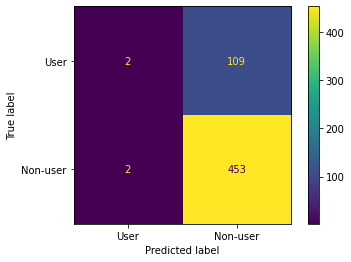

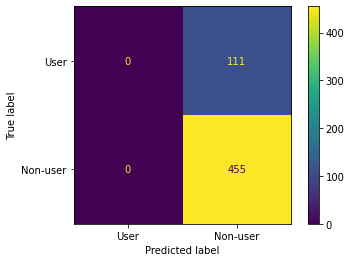

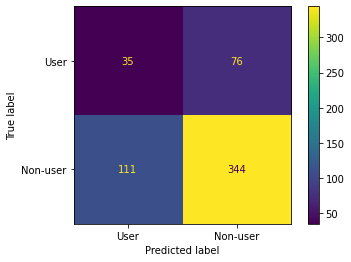

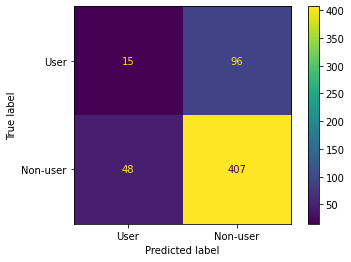

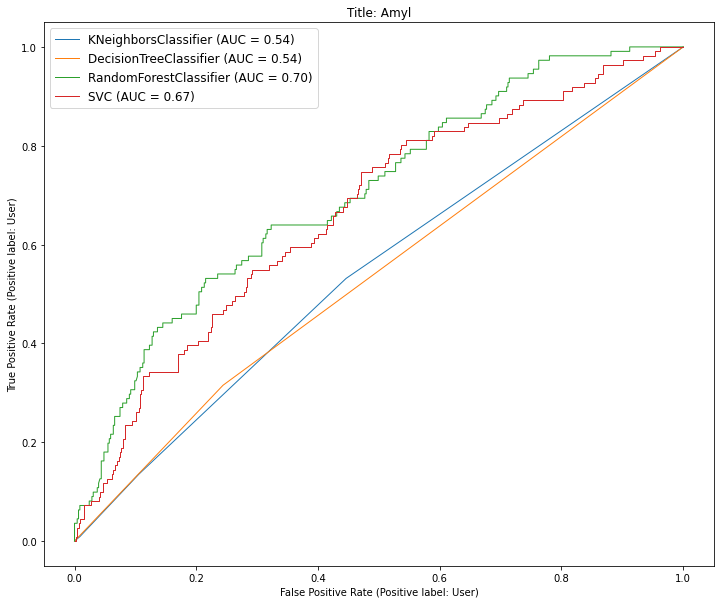

svm confusion_matrix: [[128 114]
 [ 58 266]]
svm accuracy: 0.696113074204947
svm Presion: [0.68817204 0.7       ]
svm Recall: [0.52892562 0.82098765]
rf confusion_matrix: [[110 132]
 [ 42 282]]
rf accuracy: 0.6925795053003534
rf Presion: [0.72368421 0.68115942]
rf Recall: [0.45454545 0.87037037]
dt confusion_matrix: [[117 125]
 [111 213]]
dt accuracy: 0.5830388692579506
dt Presion: [0.51315789 0.63017751]
dt Recall: [0.48347107 0.65740741]
knn confusion_matrix: [[143  99]
 [ 83 241]]
knn accuracy: 0.6784452296819788
knn Presion: [0.63274336 0.70882353]
knn Recall: [0.59090909 0.74382716]


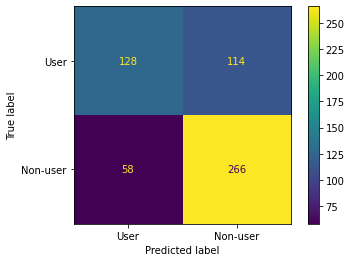

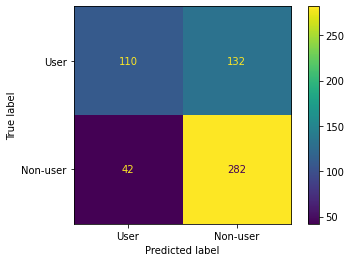

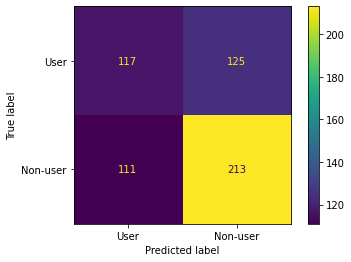

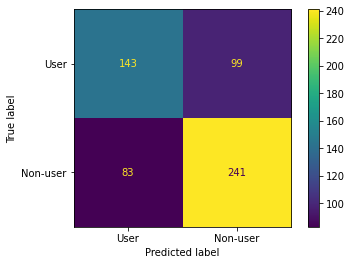

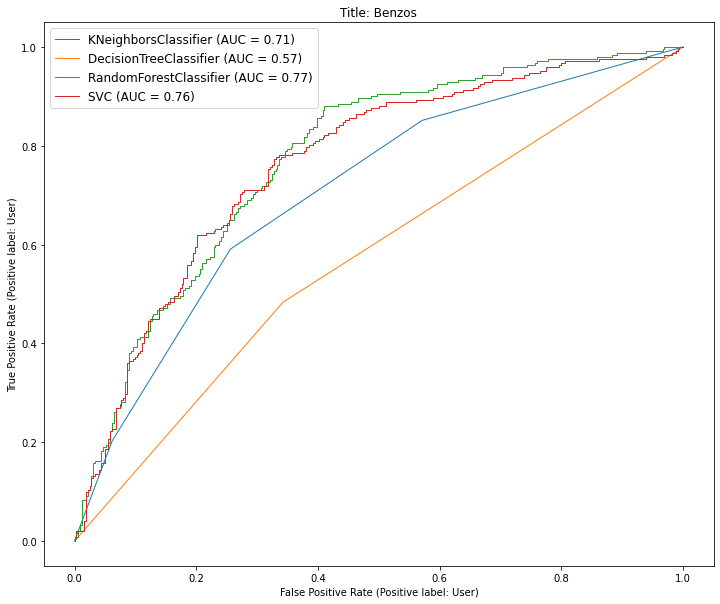

svm confusion_matrix: [[556   0]
 [ 10   0]]
svm accuracy: 0.9823321554770318
svm Presion: [0.98233216 0.        ]
svm Recall: [1. 0.]
rf confusion_matrix: [[556   0]
 [ 10   0]]
rf accuracy: 0.9823321554770318
rf Presion: [0.98233216 0.        ]
rf Recall: [1. 0.]
dt confusion_matrix: [[539  17]
 [ 10   0]]
dt accuracy: 0.9522968197879859
dt Presion: [0.98178506 0.        ]
dt Recall: [0.96942446 0.        ]
knn confusion_matrix: [[555   1]
 [ 10   0]]
knn accuracy: 0.980565371024735
knn Presion: [0.98230088 0.        ]
knn Recall: [0.99820144 0.        ]


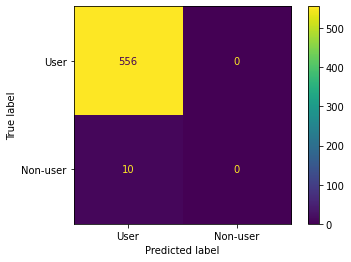

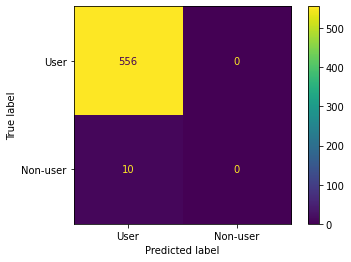

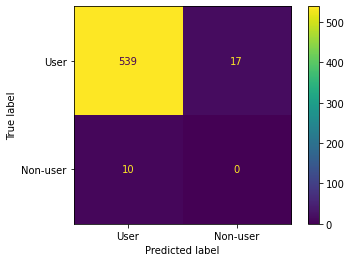

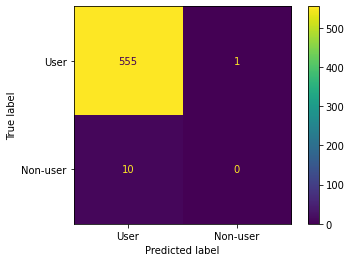

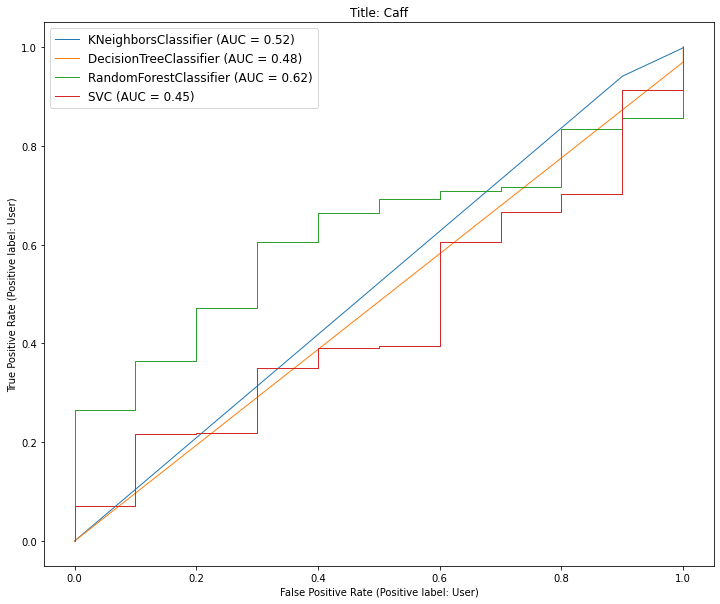

svm confusion_matrix: [[340  37]
 [ 72 117]]
svm accuracy: 0.8074204946996466
svm Presion: [0.82524272 0.75974026]
svm Recall: [0.90185676 0.61904762]
rf confusion_matrix: [[359  18]
 [120  69]]
rf accuracy: 0.7561837455830389
rf Presion: [0.74947808 0.79310345]
rf Recall: [0.95225464 0.36507937]
dt confusion_matrix: [[317  60]
 [ 95  94]]
dt accuracy: 0.726148409893993
dt Presion: [0.76941748 0.61038961]
dt Recall: [0.84084881 0.4973545 ]
knn confusion_matrix: [[318  59]
 [ 76 113]]
knn accuracy: 0.7614840989399293
knn Presion: [0.8071066  0.65697674]
knn Recall: [0.84350133 0.5978836 ]


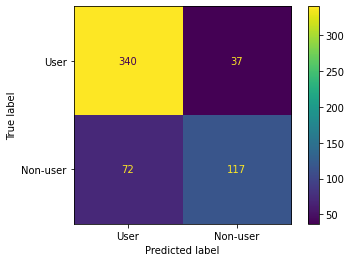

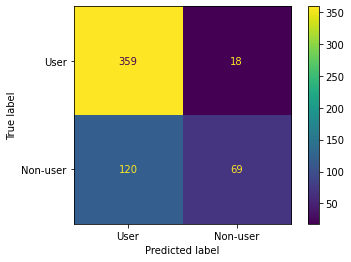

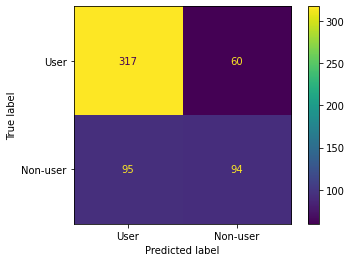

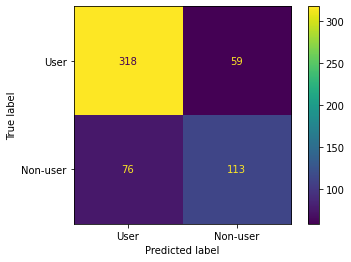

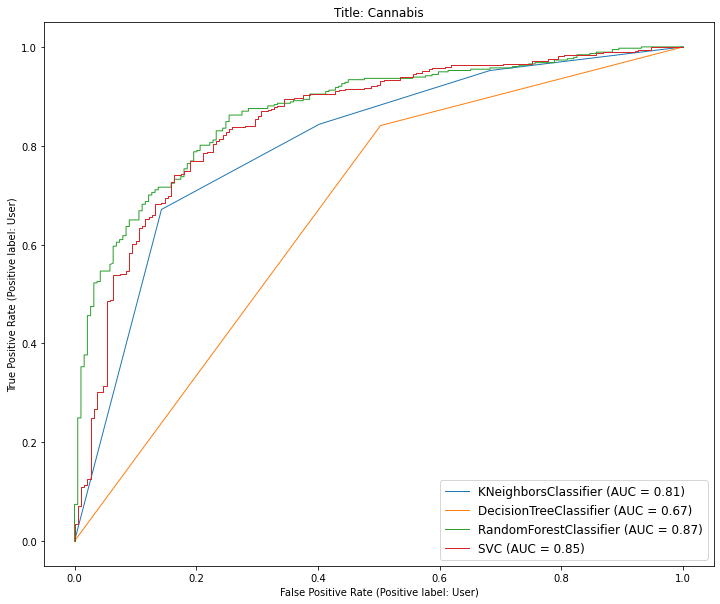

In [27]:
for i in range(len(labels)):
  y = df[labels[i]]
  X1 = preprocessing.scale(X)
  x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size=0.3)
  label = ['User','Non-user']

  #svm
  svm_clf = SVC()
  svm_clf.fit(x_train, y_train)
  y_pred_svm = svm_clf.predict(x_test)
  p_svm, r_svm, f_svm, support_svm=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_svm, labels=label)
  cm_svm = confusion_matrix(y_test, y_pred_svm, labels = label)

  print("svm confusion_matrix:",cm_svm)
  cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=label)
  cmd_svm.plot()
  
  print("svm accuracy:",svm_clf.score(x_test, y_test))
  print("svm Presion:",p_svm)
  print("svm Recall:",r_svm)

  #rf
  rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
  rf_clf.fit(x_train, y_train)
  y_pred_rf = rf_clf.predict(x_test)
  p_rf, r_rf, f_rf, support_rf=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_rf, labels=label)
  cm_rf = confusion_matrix(y_test, y_pred_rf, labels = label)

  print("rf confusion_matrix:",cm_rf)
  cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=label)
  cmd_rf.plot()
  print("rf accuracy:",rf_clf.score(x_test, y_test))
  print("rf Presion:",p_rf)
  print("rf Recall:",r_rf)

  #dt
  dt_clf = DecisionTreeClassifier(random_state=0)
  dt_clf.fit(x_train, y_train)
  y_pred_dt = dt_clf.predict(x_test)
  p_dt, r_dt, f_dt, support_dt=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_dt, labels=label)
  cm_dt = confusion_matrix(y_test, y_pred_dt, labels = label)

  print("dt confusion_matrix:",cm_dt)
  cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=label)
  cmd_dt.plot()
  
  print("dt accuracy:",dt_clf.score(x_test, y_test))
  print("dt Presion:",p_dt)
  print("dt Recall:",r_dt)

  #knn
  knn_clf = KNeighborsClassifier(n_neighbors=3)
  knn_clf.fit(x_train, y_train)
  y_pred_knn = knn_clf.predict(x_test)
  p_knn, r_knn, f_knn, support_knn=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_knn, labels=label)
  cm_knn = confusion_matrix(y_test, y_pred_knn, labels = label)

  print("knn confusion_matrix:",cm_knn)
  cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=label)
  cmd_knn.plot()
  
  print("knn accuracy:",knn_clf.score(x_test, y_test))
  print("knn Presion:",p_knn)
  print("knn Recall:",r_knn)

  #create plots
  fig,ax = plt.subplots(figsize=(12,10))
  plt.title("Title: " + labels[i])
  knn_roc = plot_roc_curve(estimator = knn_clf, X=x_test, 
                        y=y_test, ax=ax, linewidth=1)
  dt_roc = plot_roc_curve(estimator = dt_clf, X=x_test,
                        y=y_test, ax=ax, linewidth=1)
  rf_roc = plot_roc_curve(estimator = rf_clf, X=x_test,y=y_test, ax=ax, linewidth=1)
  SVM_roc = plot_roc_curve(estimator = svm_clf,X = x_test,y = y_test,ax = ax, linewidth = 1)
  
  #alter the size of characters
  ax.legend(fontsize=12)

  #show the ROC curve
  plt.show()

# Assignment2 Part

# Choose Alcohol as label

In [28]:
labels2 = ['Alcohol']

In [29]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [31]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

In [32]:
def plot_cross_val_roc(kfold,clfs,X,y):

  # Run classifier with cross-validation and plot ROC curves
  for clf in clfs:
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(kfold.split(X, y)):
        clf.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            clf,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()

In [33]:
#Define the cross validation prediction, calculate the average accuries over 10 fold
def cross_val_predict(model, kfold, X , y):

    model = cp.deepcopy(model)
    no_classes = len(np.unique(y))
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 
    total_acc = []

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        actual_classes = np.append(actual_classes, test_y)
        model.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model.predict(test_X))
        total_acc.append(accuracy_score(actual_classes,predicted_classes))

    return actual_classes, predicted_classes, round(np.mean(total_acc),2),model

In [34]:
#Define the cross validation prediction using oversampling, calculate the average accuries over tenfold
def cross_val_predict_over(model, kfold, X , y):

    model = cp.deepcopy(model)
    no_classes = len(np.unique(y))
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 
    total_acc = []
    oversample = RandomOverSampler(sampling_strategy = "minority")

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        train_X, train_y = oversample.fit_resample(train_X, train_y)
        actual_classes = np.append(actual_classes, test_y)
        model.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model.predict(test_X))
        total_acc.append(accuracy_score(actual_classes,predicted_classes))

        # try:
        #     predicted_proba = np.append(predicted_proba, model.predict_proba(test_X), axis=0)
        # except:
        #     predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, round(np.mean(total_acc),2),model

In [35]:
#Define the cross validation prediction using under sampling, calculate the average accuries over tenfold
def cross_val_predict_under(model, kfold, X , y):

    model = cp.deepcopy(model)
    no_classes = len(np.unique(y))
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 
    total_acc = []
    undersample = RandomUnderSampler(sampling_strategy = "majority")

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        train_X, train_y = undersample.fit_resample(train_X, train_y)
        actual_classes = np.append(actual_classes, test_y)
        model.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model.predict(test_X))
        total_acc.append(accuracy_score(actual_classes,predicted_classes))


    return actual_classes, predicted_classes, round(np.mean(total_acc),2),model

In [36]:
#define the confusion matrix under tenfold cross validation
def plot_confusion_matrix(actual_classes, predicted_classes, sorted_labels):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    plt.show()

In [37]:
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}

# Q5-Use the multi-layer perceptron (MLP) algorithm and the gradient boosting (GB) ensemble to construct models against datasets D, DB1, and DB2.

In [38]:
  y = df[labels2]
  X2 = preprocessing.scale(X)
  x_train, x_test, y_train, y_test = train_test_split(X2,y,test_size=0.3)

# Gradient Boosting Hyperparameter Tuning

In [39]:
# Number of trees in gradient boost
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 5, cv=10,verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(x_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
pprint(gb_random.best_params_)

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}


# MLP Hyperparameter Tuning

In [42]:
solver = ['lbfgs']
max_iter = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
alpha = 10.0 ** -np.arange(1, 10)
hidden_layer_sizes = np.arange(10,100)

In [43]:
mlp_parameters = {'solver': solver, 'max_iter': max_iter, 'alpha': alpha, 'hidden_layer_sizes':hidden_layer_sizes}

In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
mlp = MLPClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = mlp_parameters, n_iter = 5, cv=10,verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
mlp_random.fit(x_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=MLPClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                                        'hidden_layer_sizes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'max_iter': [1000, 1100, 1200, 1300,
                                                     1400, 1500, 1600, 1700,
                                                     1800, 1900, 2000],
                                        'solver': ['lbfgs']},
                   random_state=42,

In [45]:
pprint(mlp_random.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': 88, 'max_iter': 1200, 'solver': 'lbfgs'}


In [46]:
def fredman_rank(fredman):
  keys = list(fredman.keys())
  values = list(fredman.values())

  fredman_rank = {}
  for i in keys:
    fredman_rank[i] = 1
  
  max = 0
  for i,j in zip(range(len(values)),range(len(keys))):
    a = values[:i] + values[i+1:]
    for k in a:
      if k > values[i]:
        fredman_rank[keys[j]] += 1
  return fredman_rank

In [47]:
fredman_o = {}

# Original Dataset for TenFold

svm:0.97


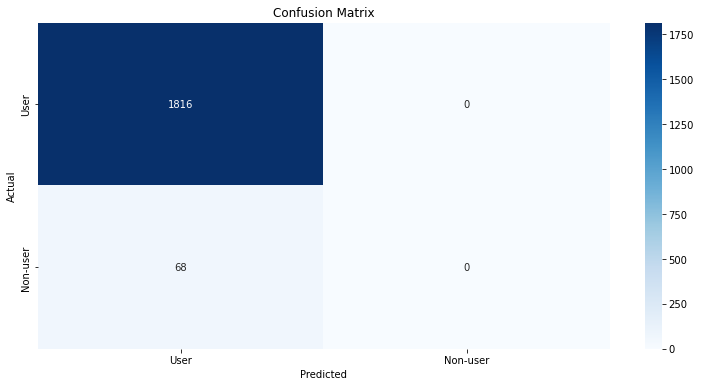

rf:0.97


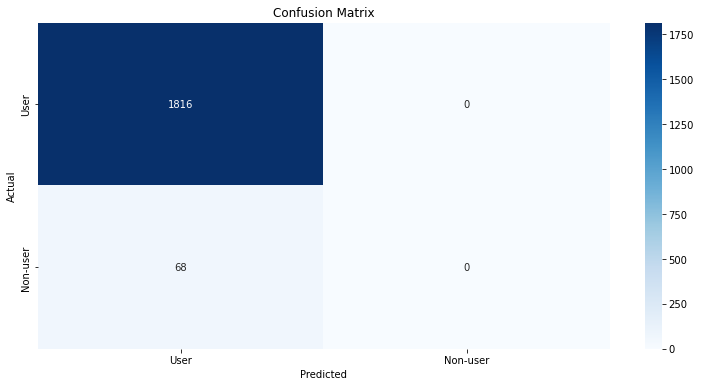

dt:0.93


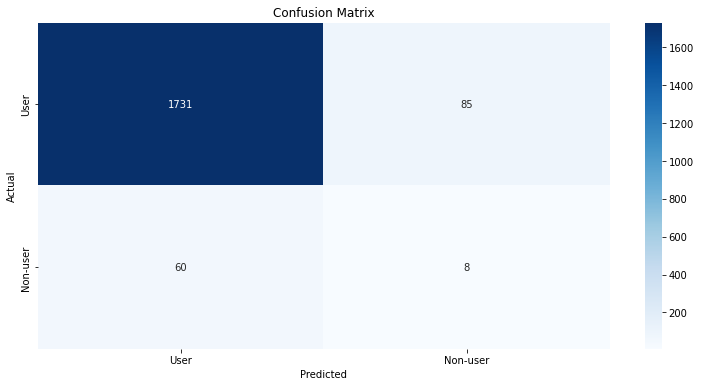

knn:0.96


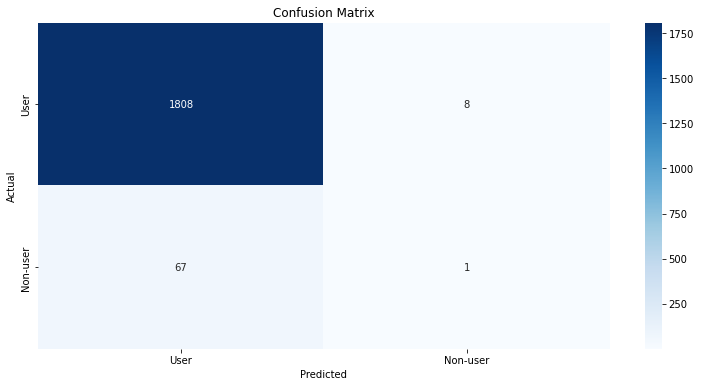

mlp:0.93


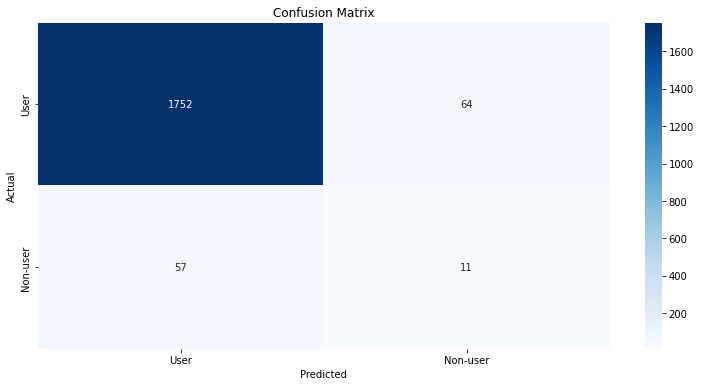

gb:0.88


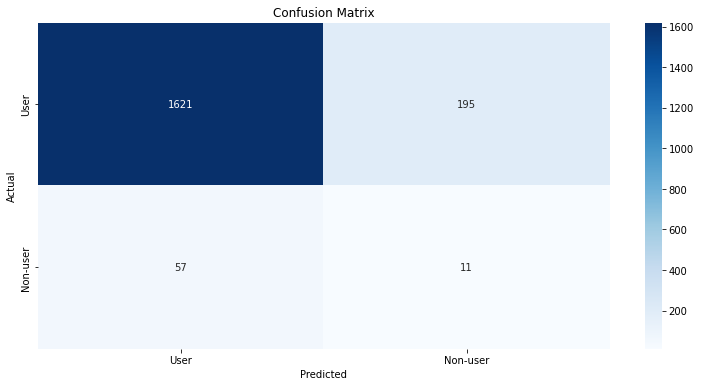

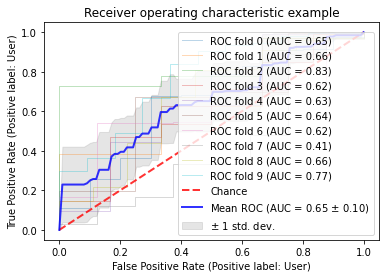

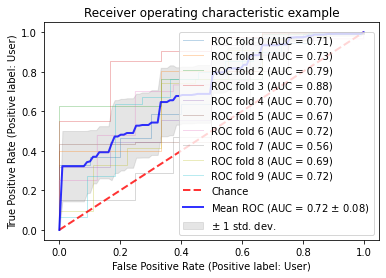

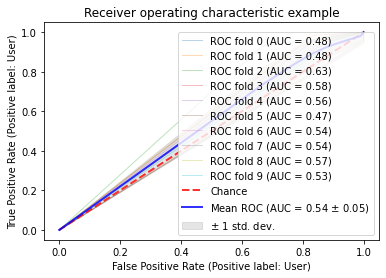

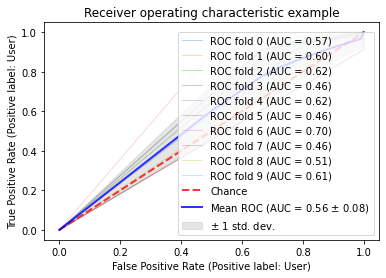

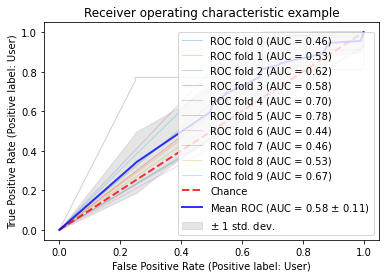

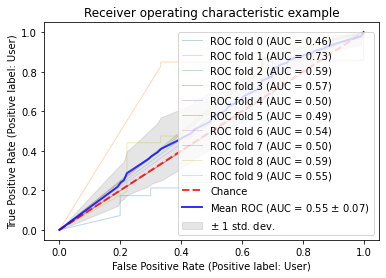

In [48]:
for i in range(len(labels2)):
  y = df[labels2[i]]
  X3 = preprocessing.scale(X)

  # x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
  labels = ['User','Non-user']

  #svm
  svm_clf = SVC(random_state = 42)
  result_svm = cross_val_predict(svm_clf,kfold,X3,y)
  print('svm:' + str(result_svm[2]))
  plot_confusion_matrix(result_svm[0], result_svm[1], labels)
  fredman_o['svm'] = result_svm[2]

  #rf
  rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
  result_rf = cross_val_predict(rf_clf,kfold,X3,y)
  print('rf:' + str(result_rf[2]))
  plot_confusion_matrix(result_rf[0], result_rf[1], labels)
  fredman_o['rf'] = result_rf[2]
  
  #dt
  dt_clf = DecisionTreeClassifier(random_state=0)
  result_dt = cross_val_predict(dt_clf,kfold,X3,y)
  print('dt:' + str(result_dt[2]))
  plot_confusion_matrix(result_dt[0], result_dt[1], labels)
  fredman_o['dt'] = result_dt[2]

  #knn
  knn_clf = KNeighborsClassifier(n_neighbors=3)
  result_knn = cross_val_predict(knn_clf,kfold,X3,y)
  print('knn:' + str(result_knn[2]))
  plot_confusion_matrix(result_knn[0], result_knn[1], labels)
  fredman_o['knn'] = result_knn[2]

  #mlp
  mlp_clf = MLPClassifier(random_state=1, alpha = 0.000001, hidden_layer_sizes = 50, max_iter = 1500, solver = 'lbfgs')
  result_mlp = cross_val_predict(mlp_clf,kfold,X3,y)
  print('mlp:' + str(result_mlp[2]))
  plot_confusion_matrix(result_mlp[0], result_mlp[1], labels)
  fredman_o['mlp'] = result_mlp[2]

  #gb
  gb_clf = GradientBoostingClassifier(learning_rate=1.0, random_state=0,max_depth = 50,max_features = "sqrt",min_samples_leaf = 2,
  min_samples_split = 10,n_estimators = 200)
  result_gb = cross_val_predict(gb_clf,kfold,X3,y)
  print('gb:' + str(result_gb[2]))
  plot_confusion_matrix(result_gb[0], result_gb[1], labels)
  fredman_o['gb'] = result_gb[2]

  clfs = [svm_clf,rf_clf,dt_clf,knn_clf,mlp_clf,gb_clf]
  plot_cross_val_roc(kfold,clfs,X3,y)
  
  #alter the size of characters
  ax.legend(fontsize=12)

  #show the ROC curve
  plt.show()

In [49]:
fredman_o_df = pd.DataFrame([fredman_o])
fredman_o_df

,svm,rf,dt,knn,mlp,gb
0,0.97,0.97,0.93,0.96,0.93,0.88


In [50]:
fredman_o_rank = fredman_rank(fredman_o)
fredman_o_rank['dataset'] = 'D'

In [51]:
fredman_o_rank = pd.DataFrame([fredman_o_rank])
fredman_o_rank

,svm,rf,dt,knn,mlp,gb,dataset
0,1,1,4,3,4,6,D


# Q1-OverSample-DB1
# Q2-retrain four models

In [52]:
fredman_os = {}

svm:0.85


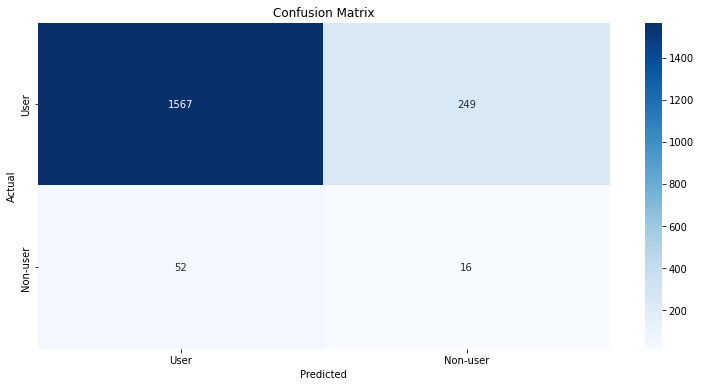

rf:0.73


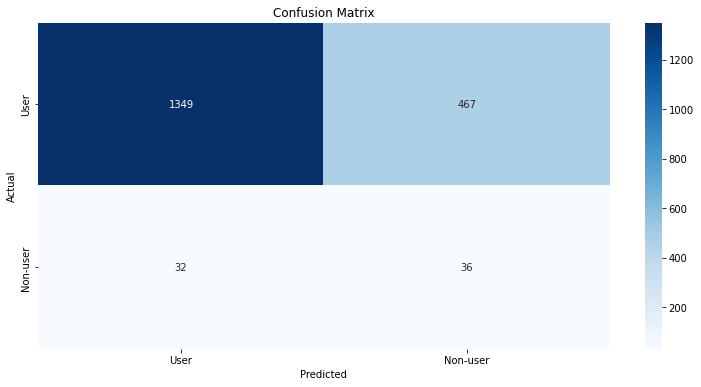

dt:0.94


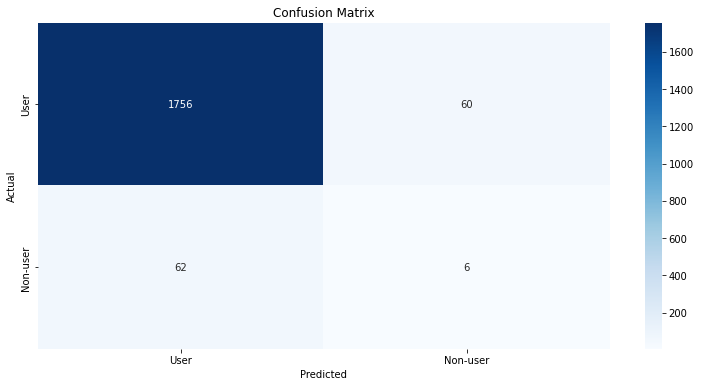

knn:0.91


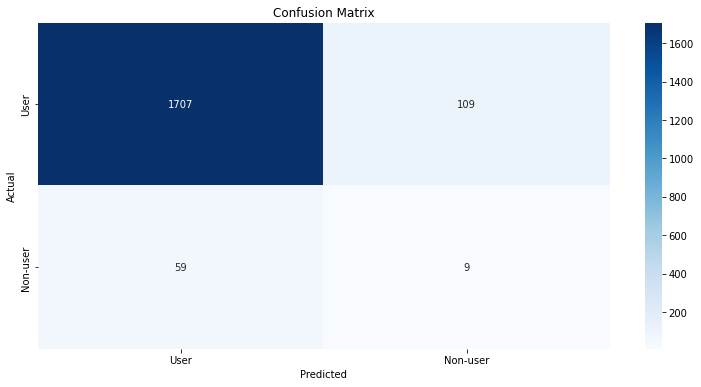

mlp:0.93


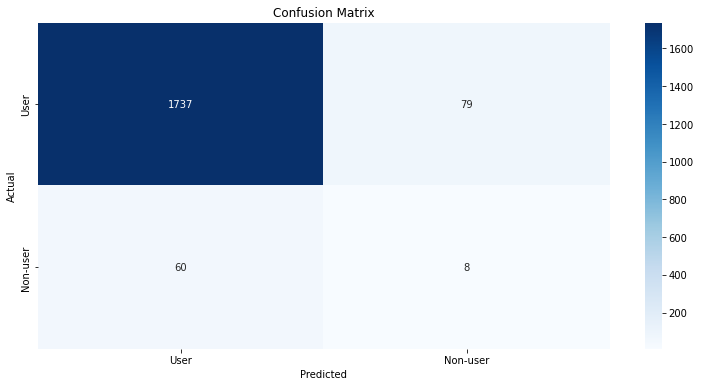

gb:0.97


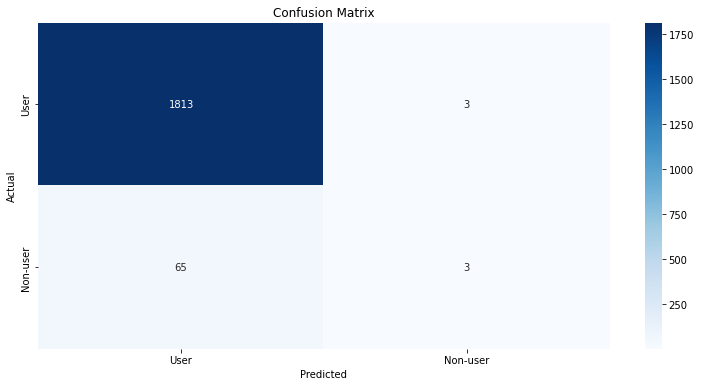

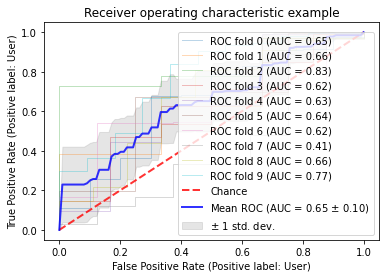

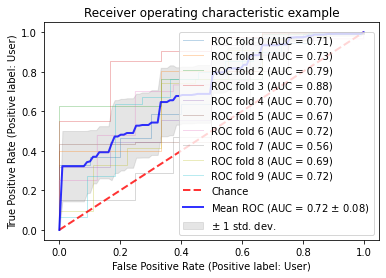

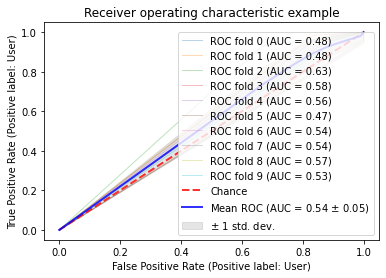

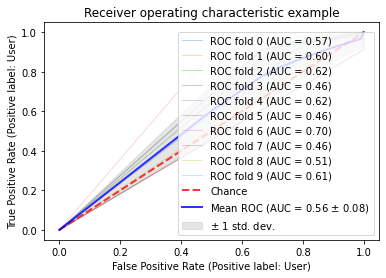

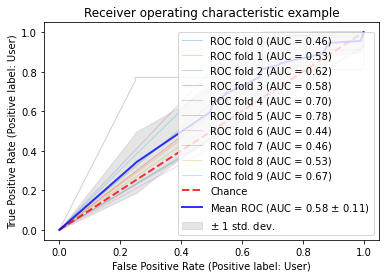

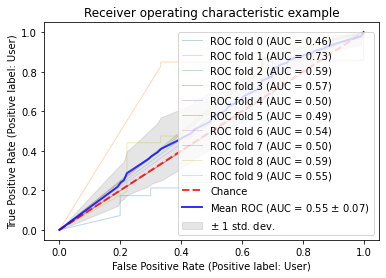

In [53]:
for i in range(len(labels2)):
  y = df[labels2[i]]
  X4 = preprocessing.scale(X)
  
  labels = ['User','Non-user']

  #svm
  svm_clf = SVC(random_state = 42)
  result_svm = cross_val_predict_over(svm_clf,kfold,X4,y)
  print('svm:' + str(result_svm[2]))
  plot_confusion_matrix(result_svm[0], result_svm[1], labels)
  fredman_os['svm'] = result_svm[2]

  #rf
  rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
  result_rf = cross_val_predict_over(rf_clf,kfold,X4,y)
  print('rf:' + str(result_rf[2]))
  plot_confusion_matrix(result_rf[0], result_rf[1], labels)
  fredman_os['rf'] = result_rf[2]
  
  #dt
  dt_clf = DecisionTreeClassifier(random_state=0)
  result_dt = cross_val_predict_over(dt_clf,kfold,X4,y)
  print('dt:' + str(result_dt[2]))
  plot_confusion_matrix(result_dt[0], result_dt[1], labels)
  fredman_os['dt'] = result_dt[2]

  #knn
  knn_clf = KNeighborsClassifier(n_neighbors=3)
  result_knn = cross_val_predict_over(knn_clf,kfold,X4,y)
  print('knn:' + str(result_knn[2]))
  plot_confusion_matrix(result_knn[0], result_knn[1], labels)
  fredman_os['knn'] = result_knn[2]

  #mlp
  mlp_clf = MLPClassifier(random_state=1, alpha = 0.000001, hidden_layer_sizes = 50, max_iter = 1500, solver = 'lbfgs')
  result_mlp = cross_val_predict_over(mlp_clf,kfold,X4,y)
  print('mlp:' + str(result_mlp[2]))
  plot_confusion_matrix(result_mlp[0], result_mlp[1], labels)
  fredman_os['mlp'] = result_mlp[2]

  #gb
  gb_clf = GradientBoostingClassifier(learning_rate=1.0, random_state=0,max_depth = 50,max_features = "sqrt",min_samples_leaf = 2,
  min_samples_split = 10,n_estimators = 200)
  result_gb = cross_val_predict_over(gb_clf,kfold,X4,y)
  print('gb:' + str(result_gb[2]))
  plot_confusion_matrix(result_gb[0], result_gb[1], labels)
  fredman_os['gb'] = result_gb[2]

  clfs = [svm_clf,rf_clf,dt_clf,knn_clf,mlp_clf,gb_clf]
  plot_cross_val_roc(kfold,clfs,X4,y)

In [54]:
fredman_os_df = pd.DataFrame([fredman_os])
fredman_os_df

,svm,rf,dt,knn,mlp,gb
0,0.85,0.73,0.94,0.91,0.93,0.97


In [55]:
fredman_os_rank = fredman_rank(fredman_os)
fredman_os_rank['dataset'] = 'DB1'

In [56]:
fredman_os_rank = pd.DataFrame([fredman_os_rank])
fredman_os_rank

,svm,rf,dt,knn,mlp,gb,dataset
0,5,6,2,4,3,1,DB1


# Q3-UnderSample-DB2
# Q4-retrain four models

In [57]:
fredman_us = {}

svm:0.6


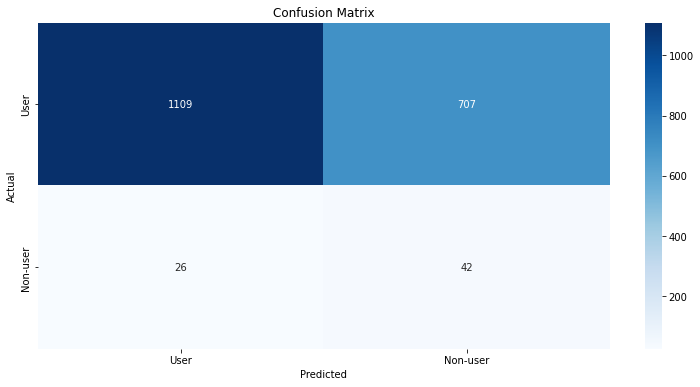

rf:0.69


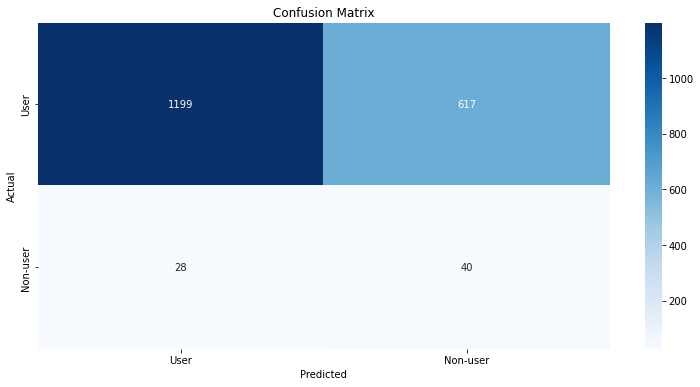

dt:0.57


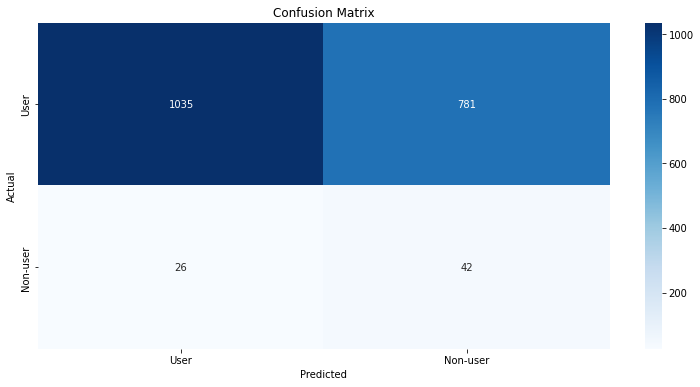

knn:0.6


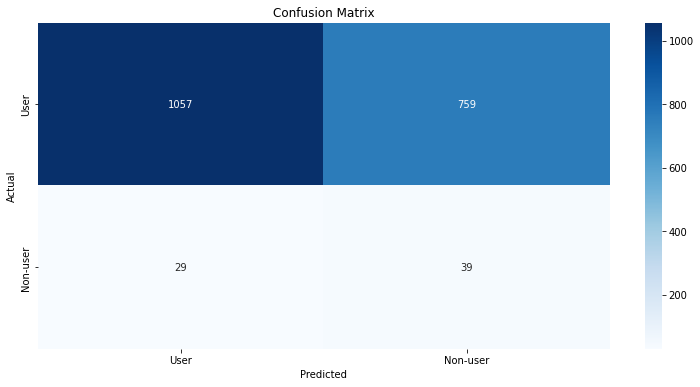

mlp:0.59


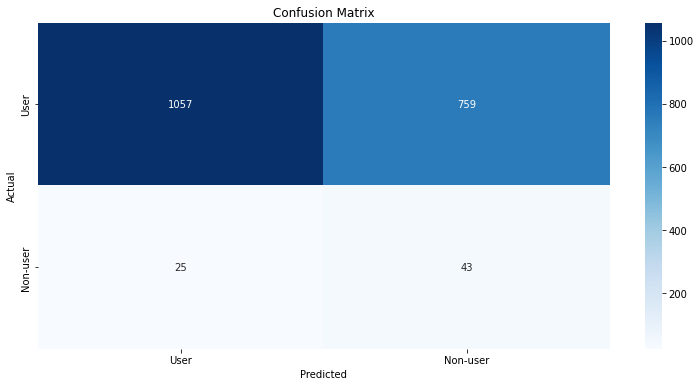

gb:0.59


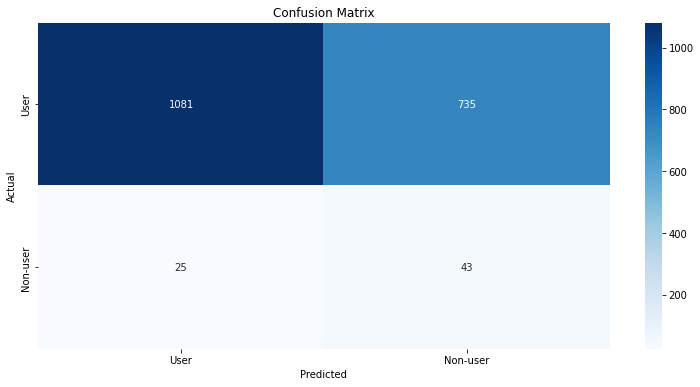

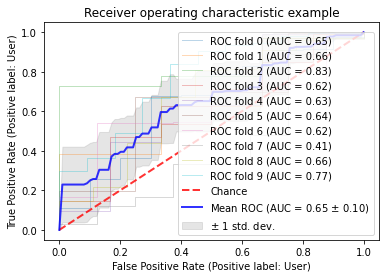

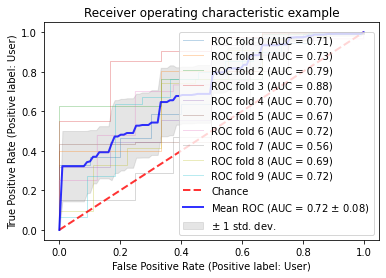

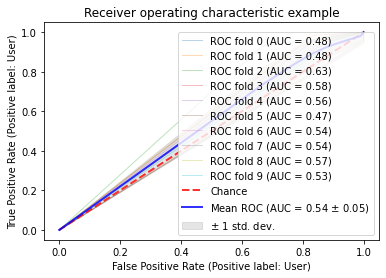

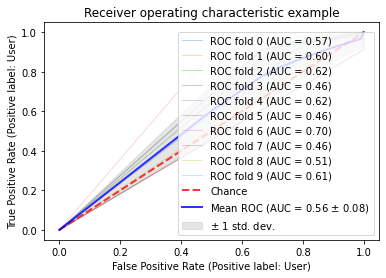

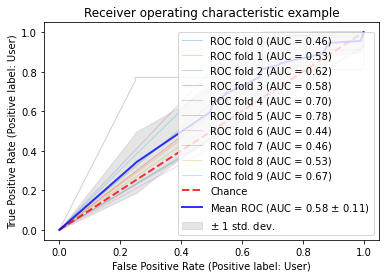

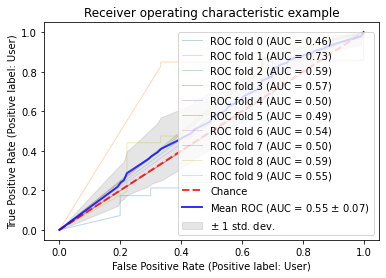

In [58]:
for i in range(len(labels2)):
  y = df[labels2[i]]
  X5 = preprocessing.scale(X)
  # undersample = RandomUnderSampler(sampling_strategy='majority')
  # X5, y = undersample.fit_resample(X5,y)
  
  labels = ['User','Non-user']

  #svm
  svm_clf = SVC(random_state = 42)
  result_svm = cross_val_predict_under(svm_clf,kfold,X5,y)
  print('svm:' + str(result_svm[2]))
  plot_confusion_matrix(result_svm[0], result_svm[1], labels)
  fredman_us['svm'] = result_svm[2]

  #rf
  rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
  result_rf = cross_val_predict_under(rf_clf,kfold,X5,y)
  print('rf:' + str(result_rf[2]))
  plot_confusion_matrix(result_rf[0], result_rf[1], labels)
  fredman_us['rf'] = result_rf[2]
  
  #dt
  dt_clf = DecisionTreeClassifier(random_state=0)
  result_dt = cross_val_predict_under(dt_clf,kfold,X5,y)
  print('dt:' + str(result_dt[2]))
  plot_confusion_matrix(result_dt[0], result_dt[1], labels)
  fredman_us['dt'] = result_dt[2]

  #knn
  knn_clf = KNeighborsClassifier(n_neighbors=3)
  result_knn = cross_val_predict_under(knn_clf,kfold,X5,y)
  print('knn:' + str(result_knn[2]))
  plot_confusion_matrix(result_knn[0], result_knn[1], labels)
  fredman_us['knn'] = result_knn[2]

  #mlp
  mlp_clf = MLPClassifier(random_state=1, alpha = 0.000001, hidden_layer_sizes = 50, max_iter = 1500, solver = 'lbfgs')
  result_mlp = cross_val_predict_under(mlp_clf,kfold,X5,y)
  print('mlp:' + str(result_mlp[2]))
  plot_confusion_matrix(result_mlp[0], result_mlp[1], labels)
  fredman_us['mlp'] = result_mlp[2]

  #gb
  gb_clf = GradientBoostingClassifier(learning_rate=1.0, random_state=0,max_depth = 50,max_features = "sqrt",min_samples_leaf = 2,
  min_samples_split = 10,n_estimators = 200)
  result_gb = cross_val_predict_under(gb_clf,kfold,X5,y)
  print('gb:' + str(result_gb[2]))
  plot_confusion_matrix(result_gb[0], result_gb[1], labels)
  fredman_us['gb'] = result_gb[2]

  clfs = [svm_clf,rf_clf,dt_clf,knn_clf,mlp_clf,gb_clf]
  plot_cross_val_roc(kfold,clfs,X5,y)

In [59]:
fredman_us_rank = fredman_rank(fredman_us)
fredman_us_rank['dataset'] = 'DB2'

In [60]:
fredman_us_rank = pd.DataFrame([fredman_us_rank])
fredman_us_rank

,svm,rf,dt,knn,mlp,gb,dataset
0,2,1,6,2,4,4,DB2


In [61]:
fredman_us_df = pd.DataFrame([fredman_us])
fredman_us_df

,svm,rf,dt,knn,mlp,gb
0,0.6,0.69,0.57,0.6,0.59,0.59


In [62]:
fredman_o_df

,svm,rf,dt,knn,mlp,gb
0,0.97,0.97,0.93,0.96,0.93,0.88


In [63]:
fredman_os_df

,svm,rf,dt,knn,mlp,gb
0,0.85,0.73,0.94,0.91,0.93,0.97


In [64]:
fredman_ln_df = pd.read_csv('/content/drive/My Drive/5155-hw2/fredman_ln_df.csv')
fredman_ln_df

,svm,rf,dt,knn,mlp,gb
0,0.95,0.84,0.87,0.92,0.96,0.82


In [65]:
fredman_ln_rank = pd.read_csv('/content/drive/My Drive/5155-hw2/fredman_ln_rank.csv')
fredman_ln_rank

,svm,rf,dt,knn,mlp,gb,dataset
0,2,5,4,3,1,6,labor negotiation


In [66]:
fredman_hd_df = pd.read_csv('/content/drive/My Drive/5155-hw2/fredman_hd_df.csv')
fredman_hd_df

,svm,rf,dt,knn,mlp,gb
0,0.83,0.83,0.75,0.79,0.78,0.78


In [67]:
fredman_hd_rank = pd.read_csv('/content/drive/My Drive/5155-hw2/fredman_hd_rank.csv')
fredman_hd_rank

,svm,rf,dt,knn,mlp,gb,dataset
0,1,1,6,3,4,4,heart disease


# Q7-Create a table to show the accuracies of the six (6) algorithms against the five (5) datasets

In [68]:
fredman_test = pd.concat([fredman_o_df,fredman_os_df,fredman_us_df,fredman_ln_df,fredman_hd_df])

In [69]:
fredman_test

,svm,rf,dt,knn,mlp,gb
0,0.97,0.97,0.93,0.96,0.93,0.88
0,0.85,0.73,0.94,0.91,0.93,0.97
0,0.60,0.69,0.57,0.60,0.59,0.59
0,0.95,0.84,0.87,0.92,0.96,0.82
0,0.83,0.83,0.75,0.79,0.78,0.78


In [142]:
fredman_test_rank = pd.concat([fredman_o_rank,fredman_os_rank,fredman_us_rank,fredman_ln_rank,fredman_hd_rank])
fredman_test_rank

,svm,rf,dt,knn,mlp,gb,dataset
0,1,1,4,3,4,6,D
0,5,6,2,4,3,1,DB1
0,2,1,6,2,4,4,DB2
0,2,5,4,3,1,6,labor negotiation
0,1,1,6,3,4,4,heart disease


In [88]:
fredman_test['dataset'] = fredman_test_rank['dataset']

In [90]:
fredman_test

,svm,rf,dt,knn,mlp,gb,dataset
0,0.97,0.97,0.93,0.96,0.93,0.88,D
0,0.85,0.73,0.94,0.91,0.93,0.97,DB1
0,0.60,0.69,0.57,0.60,0.59,0.59,DB2
0,0.95,0.84,0.87,0.92,0.96,0.82,labor negotiation
0,0.83,0.83,0.75,0.79,0.78,0.78,heart disease


In [143]:
fredman_test_rank.set_index('dataset',inplace = True)

In [144]:
fredman_test_rank

,svm,rf,dt,knn,mlp,gb
dataset,,,,,,
D,1,1,4,3,4,6
DB1,5,6,2,4,3,1
DB2,2,1,6,2,4,4
labor negotiation,2,5,4,3,1,6
heart disease,1,1,6,3,4,4


In [145]:
svm_avg = fredman_test_rank['svm'].mean()
rf_avg = fredman_test_rank['rf'].mean()
dt_avg = fredman_test_rank['dt'].mean()
knn_avg = fredman_test_rank['knn'].mean()
mlp_avg = fredman_test_rank['mlp'].mean()
gb_avg = fredman_test_rank['gb'].mean()

In [74]:
fredman_test_rank.columns

Index(['svm', 'rf', 'dt', 'knn', 'mlp', 'gb'], dtype='object')

In [146]:
total_avg = 0
for i in fredman_test_rank.columns:
  total_avg += fredman_test_rank[i].mean()
  print(str(i) + ':' + str(fredman_test_rank[i].mean()))
# R_bar = total_avg/fredman_test_rank.shape[1]
# print('R_bar:' + str(round(R_bar,2)))

svm:2.2
rf:2.8
dt:4.4
knn:3.0
mlp:3.2
gb:4.2


In [147]:
R_bar = 3.5

In [148]:
eq2 = 5*((svm_avg - R_bar)**2 + (rf_avg - R_bar)**2 + (dt_avg - R_bar)**2 + (knn_avg - R_bar)**2 + (mlp_avg - R_bar)**2 + (gb_avg - R_bar)**2)

In [149]:
eq2

19.1

In [79]:
fredman_test_rank.columns

Index(['svm', 'rf', 'dt', 'knn', 'mlp', 'gb'], dtype='object')

In [150]:
for i in fredman_test_rank.columns:
  fredman_test_rank[i] = abs(fredman_test_rank[i] - R_bar)

In [151]:
fredman_test_rank['(R - R_bar)^2'] = (fredman_test_rank['svm'])**2 + (fredman_test_rank['rf'])**2 + (fredman_test_rank['dt'])**2 + (fredman_test_rank['knn'])**2 + (fredman_test_rank['mlp'])**2 + (fredman_test_rank['gb'])**2

In [152]:
fredman_test_rank

,svm,rf,dt,knn,mlp,gb,(R - R_bar)^2
dataset,,,,,,,
D,2.5,2.5,0.5,0.5,0.5,2.5,19.5
DB1,1.5,2.5,1.5,0.5,0.5,2.5,17.5
DB2,1.5,2.5,2.5,1.5,0.5,0.5,17.5
labor negotiation,1.5,1.5,0.5,0.5,2.5,2.5,17.5
heart disease,2.5,2.5,2.5,0.5,0.5,0.5,19.5


In [153]:
fredman_test_rank['(R - R_bar)^2'].sum()

91.5

In [154]:
eq3 = fredman_test_rank['(R - R_bar)^2'].sum()/(5*(6 - 1))
eq3

3.66

In [155]:
fredman_stat = eq2/eq3
round(fredman_stat,2)

5.22

# The fredman statistics is equal to 5.22 which is less than 10.49 so there is no critical difference between models